In [5]:
from scipy.ndimage import maximum_filter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

IMAGE_SIZE = 256
MAX_POINTS = 100
MODEL_PATH = './models/v6.h5' 

model = load_model(MODEL_PATH, compile=False)

I0000 00:00:1733796791.740068  146665 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2898 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [23]:
def predict_heatmap(image_path):
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predicted_heatmap = model.predict(img_array)[0, :, :, 0]  
    
    print(predicted_heatmap.shape)
    
    return predicted_heatmap

def get_predicted_points(heatmaps, threshold=0.01):
    predicted_points = []
    for heatmap in heatmaps:
        filtered_heatmap = maximum_filter(heatmap, size=4)
        peaks = (heatmap == filtered_heatmap) & (heatmap > threshold)
        y_indices, x_indices = np.where(peaks)
        points = np.vstack((x_indices, y_indices)).T  
        predicted_points.append(points)
    return predicted_points

def visualize_prediction(image_path):
    predicted_heatmap = predict_heatmap(image_path)
    predicted_points = get_predicted_points([predicted_heatmap])[0]
    
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img) / 255.0
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img_array)
    plt.imshow(predicted_heatmap, cmap='jet', alpha=0.5)
    if len(predicted_points) > 0:
        plt.scatter(predicted_points[:, 0], predicted_points[:, 1], color='red', s=20)
    plt.title('Heatmap Predito e Pontos Detectados')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(256, 256)


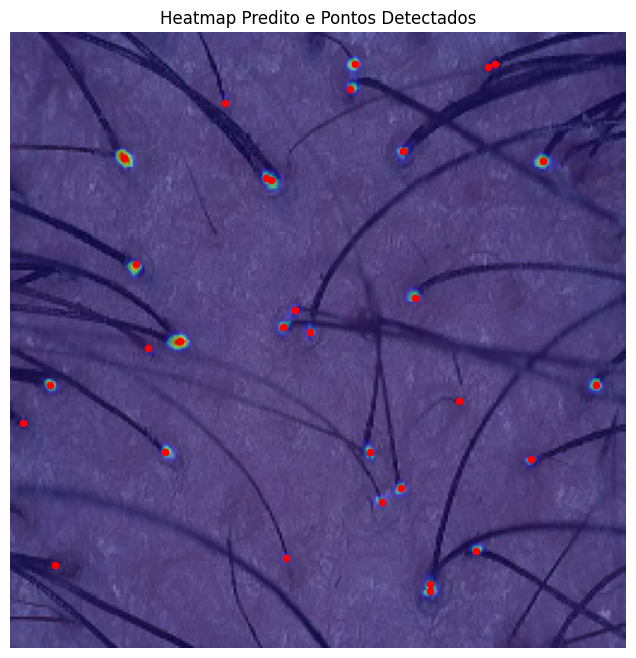

In [27]:
visualize_prediction('./dataset/22a49683-b650-4a94-93d9-df49a8e9a861.png')